In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

# Step 1: Organize the data

## A. Load and organize the Glathida dataset

In [2]:
# raw_dataset = pd.read_csv('/data/fast0/datasets/glathida-3.1.0/data/T.csv')

T = pd.read_csv('/home/sa42/data/glac/T_models/T.csv')
T.rename(columns = {
    'LAT':'T_LAT_CENT',
    'LON':'T_LON_CENT',
    'AREA':'T_AREA',
    'MEAN_SLOPE':'T_MEAN_SLOPE',
    'MEAN_THICKNESS':'T_MEAN_THICKNESS',
    'MAXIMUM_THICKNESS':'T_MAXIMUM_THICKNESS' 
},inplace=True)
TT = pd.read_csv('/home/sa42/data/glac/T_models/TT.csv')
TT.rename(columns = {
    'AREA':'TT_AREA',
    'MEAN_SLOPE':'TT_MEAN_SLOPE',
    'MEAN_THICKNESS':'TT_MEAN_THICKNESS',
    'MAXIMUM_THICKNESS':'TT_MAXIMUM_THICKNESS',   
},inplace=True)
TTT = pd.read_csv('/home/sa42/data/glac/T_models/TTT.csv')
TTT.rename(columns = {
    'ELEVATION':'POINT_ELEVATION',
    'THICKNESS':'POINT_THICKNESS',
},inplace=True)
df1 = pd.merge(T,TT, how = 'inner', on='GlaThiDa_ID')
glathida = pd.merge(df1,TTT, how = 'inner', on='GlaThiDa_ID')
glathida = glathida[[
    'GlaThiDa_ID',
    'GLACIER_DB',
    'GLACIER_ID',
    'T_LAT_CENT',
    'T_LON_CENT',
    'T_AREA',
    'T_MEAN_SLOPE',
    'T_MEAN_THICKNESS',
    'T_MAXIMUM_THICKNESS',
    'LOWER_BOUND',
    'UPPER_BOUND',
    'TT_AREA',
    'TT_MEAN_SLOPE',
    'TT_MEAN_THICKNESS',
    'TT_MAXIMUM_THICKNESS',
    'POINT_LAT',
    'POINT_LON',
    'POINT_ELEVATION',
    'POINT_THICKNESS',   
]]

# filter data by searching for specific entries
idx = glathida.index[glathida['GLACIER_DB'] == 'RGI']
glathida = glathida.loc[idx]

# ignore RGI version, e.g. RGI60
glathida['GLACIER_ID'] = glathida['GLACIER_ID'].str[6:]
glathida.rename(columns = {'GLACIER_ID':'RGIId'},inplace=True)
glathida.dropna()

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GlaThiDa_ID,GLACIER_DB,RGIId,T_LAT_CENT,T_LON_CENT,T_AREA,T_MEAN_SLOPE,T_MEAN_THICKNESS,T_MAXIMUM_THICKNESS,LOWER_BOUND,UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,TT_MEAN_THICKNESS,TT_MAXIMUM_THICKNESS,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_THICKNESS
84539,2093,RGI,16.00532,-16.3023,-68.1064,0.30970,21.0,22.0,48.0,5000,5100,0.0319,21.0,17,27.0,-16.302555,-68.110067,5009.0,5
84540,2093,RGI,16.00532,-16.3023,-68.1064,0.30970,21.0,22.0,48.0,5000,5100,0.0319,21.0,17,27.0,-16.302538,-68.110023,5011.0,6
84541,2093,RGI,16.00532,-16.3023,-68.1064,0.30970,21.0,22.0,48.0,5000,5100,0.0319,21.0,17,27.0,-16.302548,-68.109892,5013.0,11
84542,2093,RGI,16.00532,-16.3023,-68.1064,0.30970,21.0,22.0,48.0,5000,5100,0.0319,21.0,17,27.0,-16.302562,-68.109827,5013.0,12
84543,2093,RGI,16.00532,-16.3023,-68.1064,0.30970,21.0,22.0,48.0,5000,5100,0.0319,21.0,17,27.0,-16.302570,-68.109752,5015.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174523,2100,RGI,13.32330,39.2370,97.7550,2.96629,21.0,41.0,121.0,5100,5200,0.0160,32.0,0,0.0,39.235309,97.762576,4780.0,90
174524,2100,RGI,13.32330,39.2370,97.7550,2.96629,21.0,41.0,121.0,5100,5200,0.0160,32.0,0,0.0,39.235217,97.762203,4780.0,101
174525,2100,RGI,13.32330,39.2370,97.7550,2.96629,21.0,41.0,121.0,5100,5200,0.0160,32.0,0,0.0,39.235171,97.761845,4780.0,106
174526,2100,RGI,13.32330,39.2370,97.7550,2.96629,21.0,41.0,121.0,5100,5200,0.0160,32.0,0,0.0,39.235114,97.761459,4782.0,112


## B. Load and Organize the RGI datasets

In [3]:
df = pd.read_csv('/home/sa42/data/glac/glims/glims_extra/dump2/07_rgi60_Svalbard.csv',
                 encoding = 'ISO-8859-1')
RGI_07 = df

df = pd.read_csv('/home/sa42/data/glac/glims/glims_extra/dump2/10_rgi60_NorthAsia.csv',
                 encoding='ISO-8859-1')
RGI_10 = df

df = pd.read_csv('/home/sa42/data/glac/glims/glims_extra/dump2/16_rgi60_LowLatitudes.csv',
                 encoding='ISO-8859-1')
RGI_16 = df

# RGI_13 has an extra value in it somewhere and causes token error when read.
# open the file, count the columns, name the columns their number.
# this shunts the original column names to index0.
# rename columns to index0, and reset index
with open('/home/sa42/data/glac/glims/glims_extra/dump2/13_rgi60_CentralAsia.csv','r') as f:
    col_count = [ len(l.split(',')) for l in f.readlines() ]
column_names = [i for i in range(0, max(col_count))]
df = pd.read_csv('/home/sa42/data/glac/glims/glims_extra/dump2/13_rgi60_CentralAsia.csv',
                 header=None, delimiter=',',names=column_names)
col_names = list(df.iloc[0])
df = pd.read_csv('/home/sa42/data/glac/glims/glims_extra/dump2/13_rgi60_CentralAsia.csv',
                 header=None, delimiter=',', names=col_names)
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
RGI_13 = df

# put all RGI tables into one RGI table.
RGI = pd.concat([RGI_07,RGI_10,RGI_13,RGI_16])
RGI['RGIId'] = RGI['RGIId'].str[6:]
RGI = RGI.drop([
    'GLIMSId',
    'BgnDate',
    'EndDate',
    'O1Region',
    'O2Region',
    'Status',
    'Connect',
    'Form',
    'TermType',
    'Surging',
    'Linkages',
    'Name'
],axis=1)

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# C. Merge RGI and GlaThiDa along the RGI-ID
The output will include the above GlaThiDa fields, as well as Zmin, Zmax, Zmed, Aspect, and Lmax from RGI

In [4]:

RGI_glathida = pd.merge(RGI,glathida, how = 'inner', on='RGIId')
# passing the colulmns instead of dropping columns eliminates the NaN column from RGI13
RGI_glathida = RGI_glathida[[
#     'RGIId',
    'CenLon',
    'CenLat',
    'Area',
    'Zmin',
    'Zmax',
    'Zmed',
    'Slope',
    'Aspect',
    'Lmax',
#     nan,
#     'GlaThiDa_ID',
#     'GLACIER_DB',
    'T_LAT_CENT',
    'T_LON_CENT',
    'T_AREA',
    'T_MEAN_SLOPE',
    'T_MEAN_THICKNESS',
    'T_MAXIMUM_THICKNESS',
    'LOWER_BOUND',
    'UPPER_BOUND',
    'TT_AREA',
    'TT_MEAN_SLOPE',
    'TT_MEAN_THICKNESS',
    'TT_MAXIMUM_THICKNESS',
    'POINT_LAT',
    'POINT_LON',
    'POINT_ELEVATION',
    'POINT_THICKNESS'
]]
RGI_glathida = RGI_glathida.dropna()
RGI_glathida=RGI_glathida.apply(pd.to_numeric)

In [5]:
#split the dataset into test and train data sets.
train_dataset = RGI_glathida.sample(frac=0.8, random_state=1)
test_dataset = RGI_glathida.drop(train_dataset.index)

In [6]:
# sns.pairplot(test_dataset[["TT_LOWER_BOUND",
#                             "TT_UPPER_BOUND",
#                             "TT_AREA",
#                             "TT_MEAN_SLOPE",
#                             "TT_MEAN_THICKNESS",
#                             "POINT_LAT",
#                             "POINT_LON",
#                             "POINT_ELEVATION",
#                             "POINT_THICKNESS",
#                             "LAT_CENT",
#                             "LON_CENT"]],
#              diag_kind='kde')

In [7]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("POINT_THICKNESS")
test_labels = test_features.pop("POINT_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
CenLon,77.751120,40.013051
CenLat,46.760763,21.249620
Area,2.248981,2.658191
Zmin,2881.895011,1461.706439
Zmax,3633.144604,1912.445444
Zmed,3213.349280,1645.907254
Slope,24.540597,4.135108
Aspect,76.022960,84.299585
Lmax,2538.353454,2657.607860
T_LAT_CENT,39.704710,15.467823


In [8]:
#establish normalization layers
normalizer = {}
variable_list = list(train_features)
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

2022-03-18 14:14:05.804938: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-18 14:14:05.804982: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sermeq.ess.washington.edu): /proc/driver/nvidia/version does not exist
2022-03-18 14:14:05.805777: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [10]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [11]:
%%time
for variable_name in tqdm(variable_list):

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

100%|██████████| 24/24 [12:35<00:00, 31.46s/it]

CPU times: user 16min 6s, sys: 1min 36s, total: 17min 43s
Wall time: 12min 35s


{'CenLon': 30.218353271484375,
 'CenLat': 27.77134895324707,
 'Area': 32.81350326538086,
 'Zmin': 27.371021270751953,
 'Zmax': 28.689682006835938,
 'Zmed': 28.045562744140625,
 'Slope': 32.82020568847656,
 'Aspect': 31.629980087280273,
 'Lmax': 32.63452911376953,
 'T_LAT_CENT': 29.744281768798828,
 'T_LON_CENT': 30.416967391967773,
 'T_AREA': 22.240842819213867,
 'T_MEAN_SLOPE': 31.73493766784668,
 'T_MEAN_THICKNESS': 27.994409561157227,
 'T_MAXIMUM_THICKNESS': 27.400165557861328,
 'LOWER_BOUND': 28.63254165649414,
 'UPPER_BOUND': 28.708515167236328,
 'TT_AREA': 29.919292449951172,
 'TT_MEAN_SLOPE': 31.573820114135742,
 'TT_MEAN_THICKNESS': 30.713708877563477,
 'TT_MAXIMUM_THICKNESS': 30.28559112548828,
 'POINT_LAT': 29.741121292114258,
 'POINT_LON': 30.414121627807617,
 'POINT_ELEVATION': 29.40978240966797}

In [12]:
for variable_name in variable_list:    
    df = pd.DataFrame(linear_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


   Variable       loss   val_loss
99   CenLon  30.263786  30.627338

   Variable       loss   val_loss
99   CenLat  27.768845  28.258371

   Variable       loss   val_loss
99     Area  32.598843  33.062511

   Variable       loss   val_loss
99     Zmin  27.184538  27.763733

   Variable       loss   val_loss
99     Zmax  28.421116  29.089087

   Variable       loss   val_loss
99     Zmed  27.815182  28.433502

   Variable       loss   val_loss
99    Slope  32.633858  33.039368

   Variable       loss   val_loss
99   Aspect  31.500336  32.067474

   Variable       loss   val_loss
99     Lmax  32.462635  32.851536

      Variable       loss  val_loss
99  T_LAT_CENT  29.768511  30.14752

      Variable       loss  val_loss
99  T_LON_CENT  30.462494  30.81599

   Variable       loss   val_loss
99   T_AREA  22.083658  22.416252

        Variable       loss   val_loss
99  T_MEAN_SLOPE  31.489359  31.674664

            Variable       loss   val_loss
99  T_MEAN_THICKNESS  27.929392  28.211403

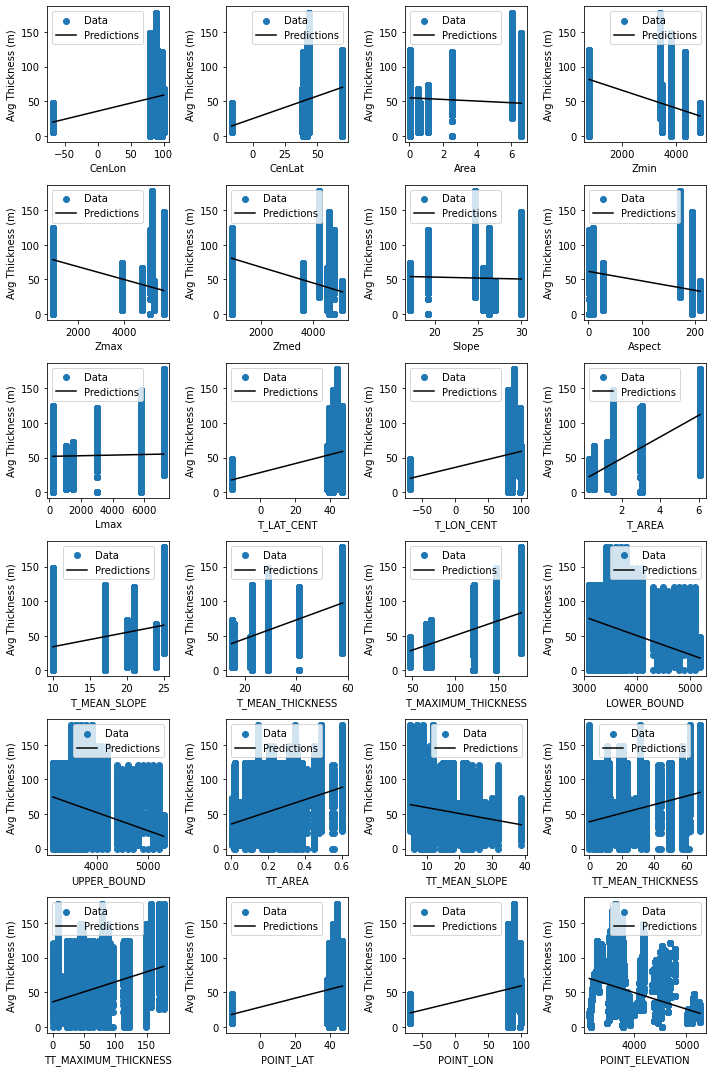

In [13]:
fig,ax=plt.subplots(6,4,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(6,4,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)
plt.tight_layout()

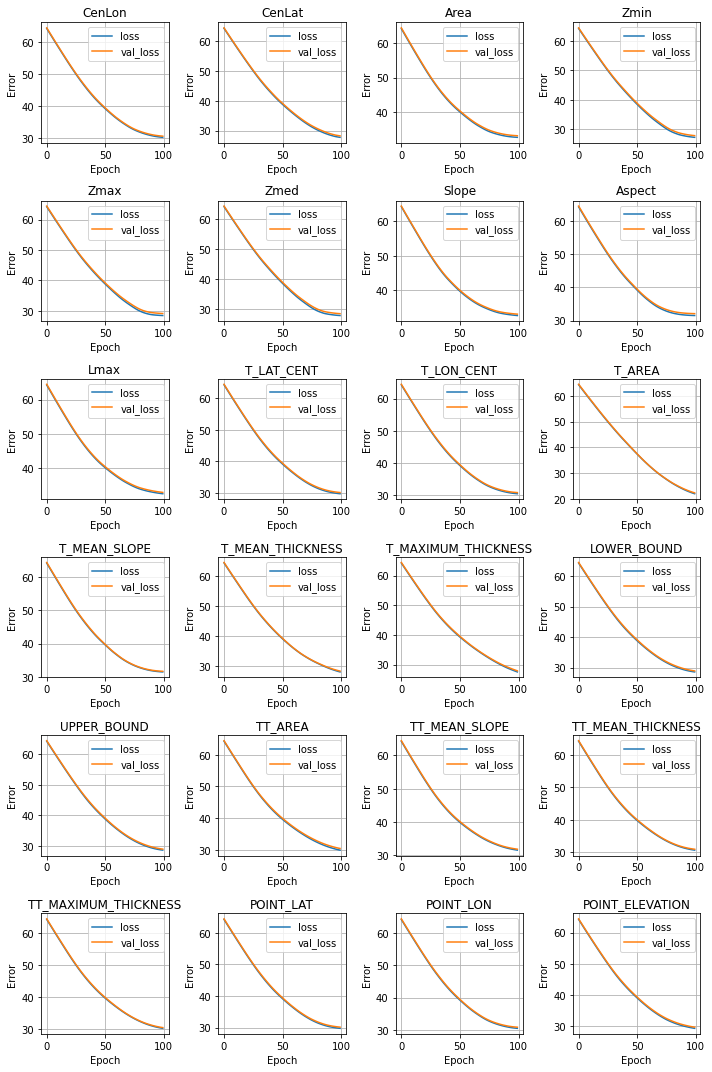

In [14]:
fig,ax=plt.subplots(6,4,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    ax = plt.subplot(6,4,i+1)

    plt.subplot(6,4,i+1)
    plot_loss(linear_history[variable_name])
    ax.set_title(variable_name)

plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_loss.eps")

In [15]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

linear_history_full = linear_model.fit(
train_features, train_labels,        
   epochs=100,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

CPU times: user 40 s, sys: 3.92 s, total: 43.9 s
Wall time: 31.3 s


{'MULTI': 19.87669563293457}

In [16]:
df = pd.DataFrame(linear_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable       loss   val_loss
99  Multi-Variable  19.778242  20.093992



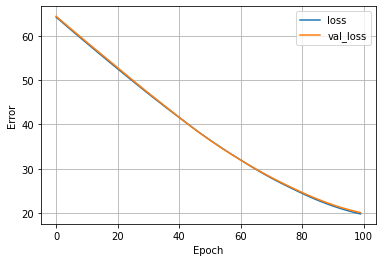

In [17]:
plot_loss(linear_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_full_loss.eps")

In [18]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [19]:
dnn_test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}
dnn_history_full = {}

In [20]:
%%time
for variable_name in tqdm(variable_list):

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

100%|██████████| 24/24 [23:34<00:00, 58.94s/it]

CPU times: user 3h 2min 50s, sys: 44min 33s, total: 3h 47min 23s
Wall time: 23min 34s


{'CenLon': 19.707658767700195,
 'CenLat': 25.82672691345215,
 'Area': 19.0768985748291,
 'Zmin': 20.776704788208008,
 'Zmax': 19.276382446289062,
 'Zmed': 20.2031192779541,
 'Slope': 19.037490844726562,
 'Aspect': 19.60641860961914,
 'Lmax': 19.844568252563477,
 'T_LAT_CENT': 24.57203483581543,
 'T_LON_CENT': 18.98724365234375,
 'T_AREA': 19.000341415405273,
 'T_MEAN_SLOPE': 20.261728286743164,
 'T_MEAN_THICKNESS': 19.277929306030273,
 'T_MAXIMUM_THICKNESS': 19.04393768310547,
 'LOWER_BOUND': 26.491018295288086,
 'UPPER_BOUND': 26.585411071777344,
 'TT_AREA': 27.717655181884766,
 'TT_MEAN_SLOPE': 29.810426712036133,
 'TT_MEAN_THICKNESS': 27.903228759765625,
 'TT_MAXIMUM_THICKNESS': 26.699623107910156,
 'POINT_LAT': 24.87357521057129,
 'POINT_LON': 19.337142944335938,
 'POINT_ELEVATION': 21.147424697875977}

In [21]:
for variable_name in variable_list:    
    df = pd.DataFrame(dnn_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


   Variable       loss   val_loss
99   CenLon  19.546751  19.736376

   Variable       loss   val_loss
99   CenLat  25.671604  26.022682

   Variable      loss   val_loss
99     Area  18.94611  19.239773

   Variable       loss   val_loss
99     Zmin  20.410307  20.530346

   Variable       loss   val_loss
99     Zmax  19.168932  19.517002

   Variable       loss   val_loss
99     Zmed  19.950565  20.014017

   Variable       loss  val_loss
99    Slope  18.900545  19.16993

   Variable       loss   val_loss
99   Aspect  19.482855  19.526119

   Variable      loss   val_loss
99     Lmax  19.53137  19.912607

      Variable       loss   val_loss
99  T_LAT_CENT  24.449545  25.023661

      Variable       loss   val_loss
99  T_LON_CENT  18.904198  19.130608

   Variable       loss   val_loss
99   T_AREA  18.915272  19.172163

        Variable       loss   val_loss
99  T_MEAN_SLOPE  20.080961  20.020548

            Variable       loss   val_loss
99  T_MEAN_THICKNESS  19.061949  19.314581



In [22]:
# dnn_results["TT_LOWER_BOUND"]

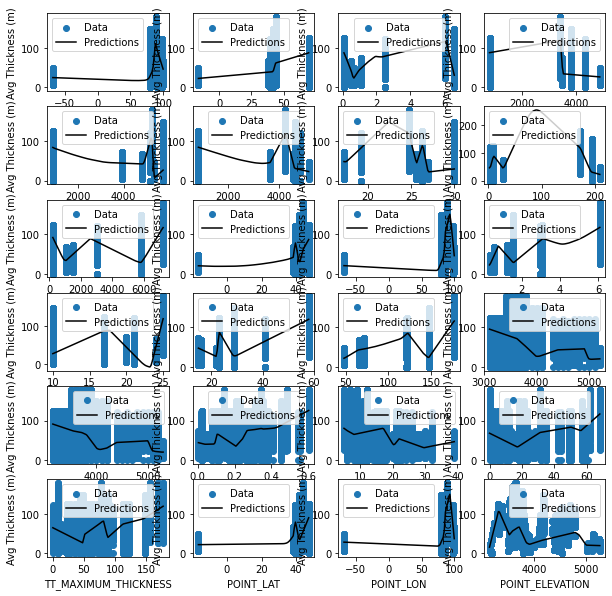

In [23]:
fig,ax=plt.subplots(6,4,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(6,4,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

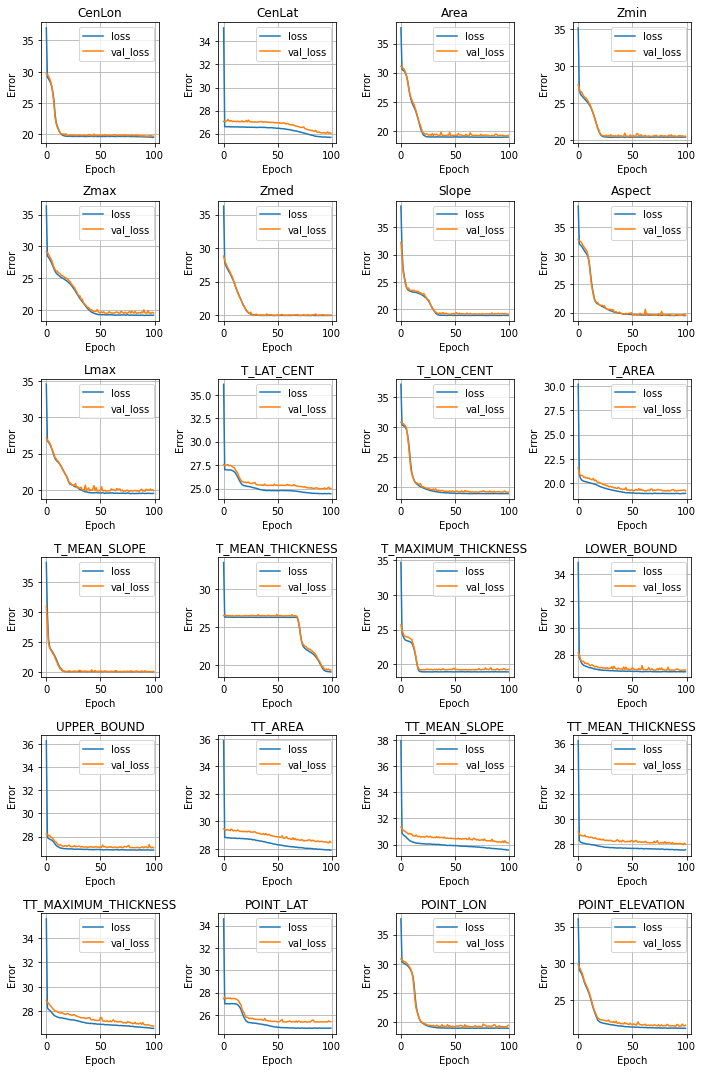

In [24]:
fig,ax=plt.subplots(6,4,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(6,4,i+1)
    ax = plt.subplot(6,4,i+1)
    ax.set_title(variable_name)
    plot_loss(dnn_history[variable_name])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_loss.eps")
plt.tight_layout()

In [25]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [26]:
%%time
dnn_history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 6min 19s, sys: 1min 53s, total: 8min 13s
Wall time: 59.1 s


In [27]:
df = pd.DataFrame(dnn_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable       loss   val_loss
99  Multi-Variable  10.868673  11.037895



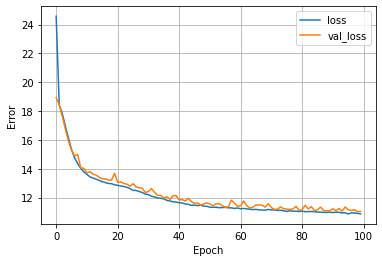

In [28]:
plot_loss(dnn_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_full_loss.eps")

In [29]:
dnn_test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

dnn_test_results


{'dnn_full_model': 10.875873565673828}

Text(0, 0.5, 'Model Thickness(m)')

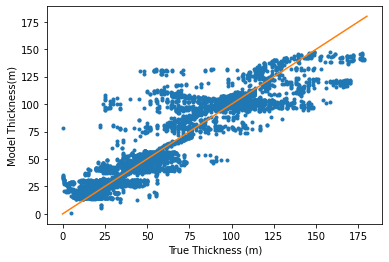

In [30]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,180),(0,180),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_res.EPS")

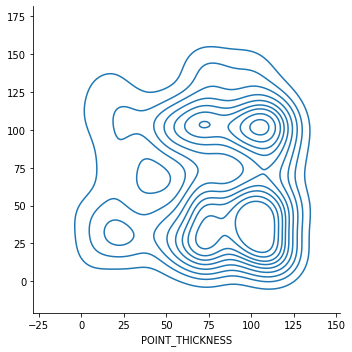

In [31]:
predictions = pd.Series(dnn_full_model.predict(test_features).flatten())
testy_testy_test = pd.concat([test_labels,predictions],axis=1)
sns.displot(testy_testy_test, x=test_labels, y=predictions, kind="kde")
